# Discrete PMF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import factorial as fact
import collections
%matplotlib inline

### Uniform PMF: 6 sided die roll

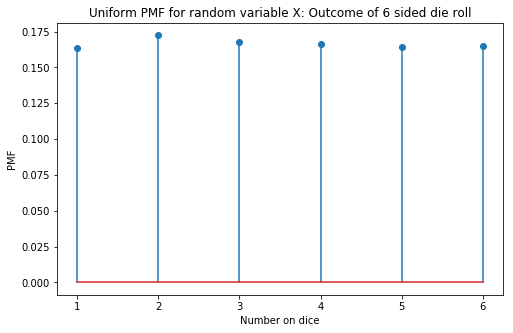

In [2]:
choices = [1, 2, 3, 4, 5, 6]

trials = 10000
outcomes = []

for i in range(trials):
    roll = random.choice(choices)
    outcomes.append(roll)
    
counter=collections.Counter(outcomes)
xvals = np.array(list(counter.keys()))
yvals = np.array(list(counter.values()))/trials

fig, ax = plt.subplots(figsize=(8,5))
ax.stem(xvals, yvals)
plt.title('Uniform PMF for random variable X: Outcome of 6 sided die roll')
plt.xlabel('Number on dice')
plt.ylabel('PMF')
plt.show()

### Geometric PMF: Coin tosses until heads

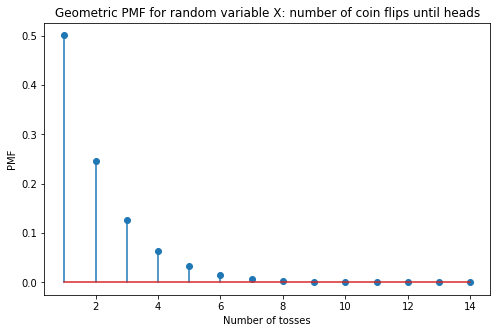

In [3]:
choices = ['h', 't']

trials = 10000
outcomes = []

for i in range(trials):
    choice = 't'
    flips = 0
    while choice == 't':
        choice = random.choice(choices)
        if choice == 'h':
            flips += 1
            break
        flips += 1
    outcomes.append(flips)
    
counter=collections.Counter(outcomes)
xvals = np.array(list(counter.keys()))
yvals = np.array(list(counter.values()))/trials

fig, ax = plt.subplots(figsize=(8,5))
ax.stem(xvals, yvals)
plt.title('Geometric PMF for random variable X: number of coin flips until heads')
plt.xlabel('Number of tosses')
plt.ylabel('PMF')
plt.show()

### PMF: Tetrahedral die rolls: Minimum of two rolls

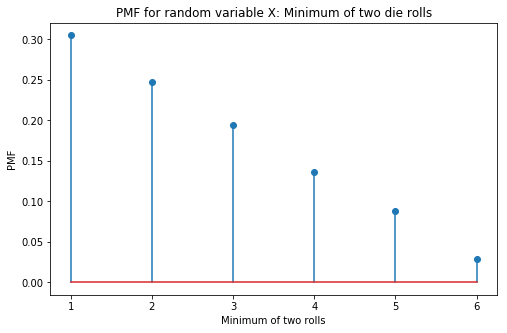

In [4]:
choices = [1, 2, 3, 4, 5, 6]

trials = 10000
outcomes = []

for i in range(trials):
    roll1 = random.choice(choices)
    roll2 = random.choice(choices)
    outcomes.append(min(roll1,roll2))
    
counter=collections.Counter(outcomes)
xvals = np.array(list(counter.keys()))
yvals = np.array(list(counter.values()))/trials

fig, ax = plt.subplots(figsize=(8,5))
ax.stem(xvals, yvals)
plt.title('PMF for random variable X: Minimum of two die rolls')
plt.xlabel('Minimum of two rolls')
plt.ylabel('PMF')
plt.show()

### Binomial PMF: Number of heads in n independent coin tosses

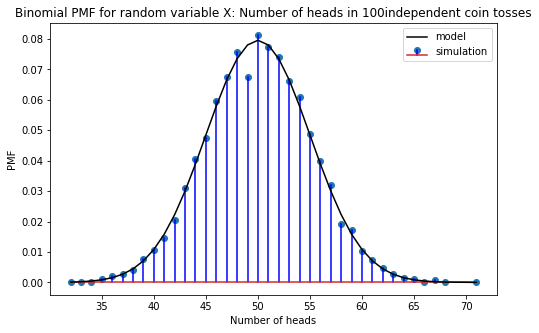

In [5]:
choices = ['h', 't']

trials = 10000
n = 100
outcomes = []

for i in range(trials):
    count = 0
    for j in range(n):
        flip = random.choice(choices)
        if flip == 'h':
            count += 1
    outcomes.append(count)

counter=collections.Counter(outcomes)
counter = collections.OrderedDict(sorted(counter.items())) 

xvals = np.array(list(counter.keys()))
yvals1 = np.array(list(counter.values()))/trials

## Binomial PMF Modelling

yvals2 = []
p = 0.5
for xval in xvals:
    nchoosek = fact(n)/(fact(xval)*fact(n-xval))
    p_X = nchoosek * p**xval * (1 - p)**(n - xval)
    yvals2.append(p_X)

fig, ax = plt.subplots(figsize=(8,5))
ax.stem(xvals, yvals1, 'b', label='simulation')
ax.plot(xvals, yvals2, 'k', label='model')

plt.title('Binomial PMF for random variable X: Number of heads in ' + str(n) + 'independent coin tosses')
plt.ylabel('PMF')
plt.xlabel('Number of heads')
plt.legend()
plt.show()

### Binomial PMF properties

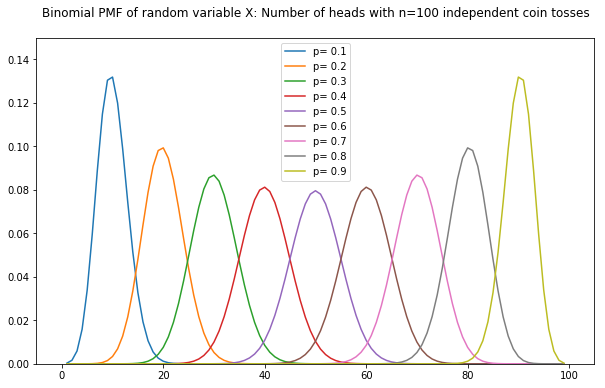

In [159]:
xvals = np.arange(1,100,1)

ps = np.arange(0.1, 1, 0.1) # probability of heads
n = 100
yvals = np.ones((len(ps), len(xvals)))

for i, p in enumerate(ps):
    for j, xval in enumerate(xvals):
        nchoosek = fact(n)/(fact(xval)*fact(n-xval))
        p_X = nchoosek * p**xval * (1 - p)**(n - xval)
        yvals[i][j] = p_X
        
plt.figure(figsize=(10,6))

for k in zip(yvals, ps):
    plt.plot(xvals, k[0], label='p= ' + str(round(k[1], 1)))

plt.title('Binomial PMF of random variable X: Number of heads with n=' + str(n) + ' independent coin tosses\n')
plt.xlim([-5, 105])
plt.ylim([0, 0.15])
plt.legend()
plt.show()